<a href="https://www.kaggle.com/code/anshulchauhan21/fifa-2023-eda-with-some-useful-insights?scriptVersionId=132415969" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-2023-dataset/FIFA23_official_data.csv


    This notebook explores the official data of FIFA 23, which includes player ratings, values, nations they played for, and their wages. The dataset provides valuable insights into the factors that influence a player's rating, value, and their respective nation.

In [2]:
# Importing the Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fifa = pd.read_csv("/kaggle/input/fifa-2023-dataset/FIFA23_official_data.csv")

In [4]:
fifa

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,€214K,40.0,NaN


In [5]:
# Data  Information

In [6]:
fifa.shape

(17660, 29)

In [7]:
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


In [8]:
# Columns of the DataFrame
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Release Clause', 'Kit Number', 'Best Overall Rating'],
      dtype='object')

In [9]:
#info()
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

# Cleaning of data

    I am going to delete some rows right away, which might not be adding any value adds to our analysis going forward. We 
    would be concentrating around players and their corresponding skills,their respective clubs and countries only. All the 
    url columns and index columns we will try removing right now.

In [10]:
#Dropping some of the columns - ID, Photo, Flag, Club Logo
fifa.drop(['ID','Photo','Flag','Club Logo','Real Face'],axis=1,inplace=True)

In [11]:
#Filtering for rows which have Loaned From column not NULL 
fifa.loc[fifa['Loaned From'].isnull()][:5]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,L. Goretzka,27,Germany,87,88,FC Bayern München,€91M,€115K,2312,Right,...,Unique,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,Bruno Fernandes,27,Portugal,86,87,Manchester United,€78.5M,€190K,2305,Right,...,Unique,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,M. Acuña,30,Argentina,85,85,Sevilla FC,€46.5M,€46K,2303,Left,...,Stocky (170-185),"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,K. De Bruyne,31,Belgium,91,91,Manchester City,€107.5M,€350K,2303,Right,...,Unique,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,N. Barella,25,Italy,86,89,Inter,€89.5M,€110K,2296,Right,...,Normal (170-),"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


    You can find some of the Loaned players in the list above.
Ohh Griezmann was on loan from Berca to Atletico. I was not aware of that! :

I guess it would be better in this case not to handle the missing values for the columns, because we might end up missing out so many players in that case.
For columns such as Loaned From might be many for many players as well, since it would be a direct contract with the player.

### PLAYER VALUE AND WAGE - DATA CLEANING¶

In [12]:
#Checking whether all values are defined in Euros or not
fifa.loc[fifa['Value'].str.startswith("€")].shape[0]

17660

In [13]:
#Checking the same for Wages.
fifa.loc[fifa['Wage'].str.startswith("€")].shape[0]

17660

In [14]:

#Splitting the value column to get just the numeric
fifa['Value']=fifa['Value'].str.split('€')
fifa['Value'] = fifa['Value'].apply(lambda x:x[1])

In [15]:
#Splitting the wage column to get just the numeric
fifa['Wage'] = fifa['Wage'].str.split('€')
fifa['Wage'] = fifa['Wage'].apply(lambda x:x[1])

In [16]:
#Converting the player value in thousand Euros to Million Euros and then stripping the end denote.
fifa_value_k=fifa.loc[fifa['Value'].str.endswith('k')]
fifa_value_k['Value']=fifa_value_k['Value'].apply(lambda x:x[-1])
fifa_value_k['Value'] = fifa_value_k['Value'].astype('float64')
fifa_value_k['Value'] = fifa_value_k['Value'] / 1000

In [17]:
#Stripping the end denote for Million Euros Player value
fifa_value_M = fifa.loc[fifa['Value'].str.endswith('M')]
fifa_value_M['Value'] = fifa_value_M['Value'].apply(lambda x: x[:-1])
fifa_value_M['Value'] = fifa_value_M['Value'].astype('float64')

/tmp/ipykernel_20/2006759014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_value_M['Value'] = fifa_value_M['Value'].apply(lambda x: x[:-1])
/tmp/ipykernel_20/2006759014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_value_M['Value'] = fifa_value_M['Value'].astype('float64')


In [18]:
#Converting the player wage in thousand Euros to Million Euros and then stripping the end denote.
fifa_value_k['Wage'] = fifa_value_k['Wage'].apply(lambda x: x[:-1] if x.endswith('K') else x)
fifa_value_k['Wage'] = fifa_value_k['Wage'].astype('float64')
fifa_value_k['Wage'] = fifa_value_k['Wage'] / 1000

In [19]:

fifa_value_M.loc[fifa_value_M['Wage'].str.endswith("M")]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating


We can find that there are no players who are having player values in Million euros having wages also in Millions. So we will go with thousand converted to millions

In [20]:
#Converting the player wage in thousand Euros to Million Euros and then stripping the end denote.
fifa_value_M['Wage'] = fifa_value_M['Wage'].apply(lambda x: x[:-1] if x.endswith('K') else x)
fifa_value_M['Wage'] = fifa_value_M['Wage'].astype('float64')
fifa_value_M['Wage'] = fifa_value_M['Wage'] / 1000

/tmp/ipykernel_20/1490736548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_value_M['Wage'] = fifa_value_M['Wage'].apply(lambda x: x[:-1] if x.endswith('K') else x)
/tmp/ipykernel_20/1490736548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_value_M['Wage'] = fifa_value_M['Wage'].astype('float64')
/tmp/ipykernel_20/1490736548.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [21]:
#Concatenating both the splitted up dataframes
fifa2 = pd.concat([fifa_value_M,fifa_value_k])
fifa2

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,L. Goretzka,27,Germany,87,88,FC Bayern München,91.0,0.115,2312,Right,...,Unique,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,Bruno Fernandes,27,Portugal,86,87,Manchester United,78.5,0.190,2305,Right,...,Unique,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,M. Acuña,30,Argentina,85,85,Sevilla FC,46.5,0.046,2303,Left,...,Stocky (170-185),"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,K. De Bruyne,31,Belgium,91,91,Manchester City,107.5,0.350,2303,Right,...,Unique,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,N. Barella,25,Italy,86,89,Inter,89.5,0.110,2296,Right,...,Normal (170-),"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16966,R. Celentano,21,United States,65,77,FC Cincinnati,1.5,0.001,891,Right,...,Normal (185+),"<span class=""pos pos0"">GK","Jan 11, 2022",NaN,2022,192cm,80kg,€2.5M,18.0,NaN
16989,22 Luis López,20,Spain,63,76,Real Madrid CF,1.0,0.011,888,Right,...,Normal (185+),"<span class=""pos pos29"">RES","Aug 27, 2020",NaN,2022,190cm,76kg,€2.7M,26.0,NaN
17029,F. Stanković,20,Serbia,66,77,FC Volendam,1.6,0.007,883,Right,...,Normal (185+),"<span class=""pos pos0"">GK",NaN,"<a href=""/team/44/inter/"">Inter</a>","Jun 30, 2023",187cm,72kg,NaN,1.0,NaN
17129,S. Westerveld,19,Spain,63,77,AZ Alkmaar,1.0,0.700,870,Right,...,Normal (185+),"<span class=""pos pos28"">SUB","Jun 18, 2021",NaN,2026,191cm,73kg,€2.1M,13.0,NaN


In [22]:
fifa2.shape

(6965, 24)

##### CLEANING THE POSITION FEATURE


In [23]:
fifa2['Position']=fifa2['Position'].str.split(">")
fifa2['Position'] = fifa2['Position'].apply(lambda x:x[1])

In [24]:
##### CLEANING THE WEIGHT COLUMN

fifa2['Weight'] = fifa2['Weight'].apply(lambda x : x[:-3])
fifa2['Weight'] = fifa2['Weight'].astype('int64')

In [25]:
# ANALYSIS ON THE PREFERED FOOT
foot = fifa2['Preferred Foot'].value_counts()
foot

Right    5196
Left     1769
Name: Preferred Foot, dtype: int64

In [26]:
foot_right=foot[0]/fifa2['Preferred Foot'].count()*100
foot_left=foot[1]/fifa2['Preferred Foot'].count()*100
foot_df=pd.DataFrame({'Percentage':[foot_right,foot_left]},index=['Right Foot','Left Foot'])
foot_df.style.background_gradient(cmap='Purples')

,Percentage
Right Foot,74.601579
Left Foot,25.398421


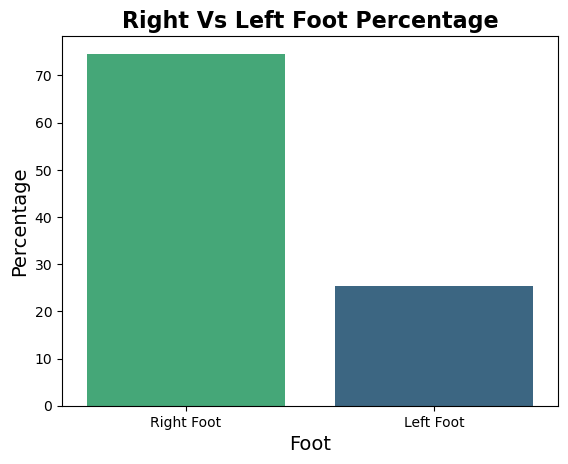

In [27]:

#Barplot for the classes
plt.title("Foot Preference")
sns.barplot(x=foot_df.index,y=foot_df['Percentage'],palette='viridis_r')
plt.xlabel("Foot",fontsize=14)
plt.ylabel("Percentage",fontsize=14)
plt.title("Right Vs Left Foot Percentage",fontweight='bold',fontsize=16)
plt.show()

    This clearly indicates the dominance of Right footers in the Football. There are just a small percentage of Left
    Footers, hence their importance.

# AVERAGE AGE OF ALL THE PLAYERS IN FIFA23 DATASET¶

In [28]:
fifa2.Age.mean()

24.651830581478823

# TOP 10 PLAYERS WITH HIGHEST OVERALL

In [29]:
fifa_overall=fifa.sort_values(['Overall'],ascending=False)[:10]

fifa_overall[['Name','Overall','Potential','Club','Preferred Foot','Position', 'Nationality']].style.background_gradient(cmap='viridis_r').hide_index()

/tmp/ipykernel_20/3652970219.py:3: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  fifa_overall[['Name','Overall','Potential','Club','Preferred Foot','Position', 'Nationality']].style.background_gradient(cmap='viridis_r').hide_index()


Name,Overall,Potential,Club,Preferred Foot,Position,Nationality
R. Lewandowski,91,91,FC Barcelona,Right,ST,Poland
K. Benzema,91,91,Real Madrid CF,Right,CF,France
K. De Bruyne,91,91,Manchester City,Right,RCM,Belgium
L. Messi,91,91,Paris Saint-Germain,Left,RW,Argentina
K. Mbappé,91,95,Paris Saint-Germain,Right,ST,France
M. Salah,90,90,Liverpool,Left,RW,Egypt
T. Courtois,90,91,Real Madrid CF,Left,GK,Belgium
Cristiano Ronaldo,90,90,Manchester United,Right,ST,Portugal
V. van Dijk,90,90,Liverpool,Right,LCB,Netherlands
M. Neuer,90,90,FC Bayern München,Right,GK,Germany


These are the top 10 ->
* L. Messi, R. Lewandowski, Neymar Jr, K. De Bruyne, Cristiano Ronaldo, K. Mbappé, J. Oblak, H. Kane, M. ter Stegen, M. Neuer

* **Interesting FACT -> 2 German Goalkeepers in the top10 list.**

* And also I WONDER HOW PSG IS LOSING SO MANY MATCHES -> 3 OF THEIR BEST ARE IN THE TOP10 TOO

# TOP 10 PLAYERS WITH HIGHEST POTENTIAL

In [30]:
fifa_potential = fifa2.sort_values(['Potential'],ascending=False)[:10]
fifa_potential[['Name','Overall','Potential','Club','Preferred Foot','Position']].style.background_gradient(cmap='viridis_r').hide_index()

/tmp/ipykernel_20/3763767834.py:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  fifa_potential[['Name','Overall','Potential','Club','Preferred Foot','Position']].style.background_gradient(cmap='viridis_r').hide_index()


Name,Overall,Potential,Club,Preferred Foot,Position
K. Mbappé,91,95,Paris Saint-Germain,Right,ST
E. Haaland,88,94,Manchester City,Left,ST
Pedri,85,93,FC Barcelona,Right,LCM
G. Donnarumma,88,92,Paris Saint-Germain,Right,GK
P. Foden,85,92,Manchester City,Left,RW
F. de Jong,87,92,FC Barcelona,Right,RCM
Vinícius Jr.,86,92,Real Madrid CF,Right,LW
T. Courtois,90,91,Real Madrid CF,Left,GK
R. Lewandowski,91,91,FC Barcelona,Right,ST
J. Oblak,89,91,Atlético de Madrid,Right,GK


# TOP 10 GOALKEEPER IN POTENTIAL AND OVERALL

In [31]:
Goal_keeper_data = fifa2[fifa2['Position'] == 'GK'][['Name', 'Club', 'Overall', 'Potential']].sort_values(by='Overall', ascending=False)[:10]
Goal_keeper_data

,Name,Club,Overall,Potential
9151,M. Neuer,FC Bayern München,90,90
14357,T. Courtois,Real Madrid CF,90,91
7843,Ederson,Manchester City,89,91
11953,Alisson,Liverpool,89,90
12893,J. Oblak,Atlético de Madrid,89,91
13506,G. Donnarumma,Paris Saint-Germain,88,92
11774,M. ter Stegen,FC Barcelona,88,89
12954,H. Lloris,Tottenham Hotspur,87,87
12559,De Gea,Manchester United,87,87
10267,M. Maignan,AC Milan,87,90


In [32]:
Goal_keeper_data[['Name', 'Club','Overall', 'Potential']].style.background_gradient(cmap='viridis_r').hide_index()

/tmp/ipykernel_20/3742929271.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  Goal_keeper_data[['Name', 'Club','Overall', 'Potential']].style.background_gradient(cmap='viridis_r').hide_index()


Name,Club,Overall,Potential
M. Neuer,FC Bayern München,90,90
T. Courtois,Real Madrid CF,90,91
Ederson,Manchester City,89,91
Alisson,Liverpool,89,90
J. Oblak,Atlético de Madrid,89,91
G. Donnarumma,Paris Saint-Germain,88,92
M. ter Stegen,FC Barcelona,88,89
H. Lloris,Tottenham Hotspur,87,87
De Gea,Manchester United,87,87
M. Maignan,AC Milan,87,90


# TOP 10 Defender IN POTENTIAL AND OVERALL

In [33]:
Defender_data = fifa2[fifa2['Position'].isin(['LB', 'CB', 'RB', 'LCB', 'RCB'])][['Name', 'Club','Position','Overall', 'Potential']].sort_values(by='Overall', ascending=False)[:10]
Defender_data

,Name,Club,Position,Overall,Potential
192,V. van Dijk,Liverpool,LCB,90,90
318,Marquinhos,Paris Saint-Germain,CB,88,90
9,João Cancelo,Manchester City,LB,88,88
126,17 P. Lahm,FC Bayern München,RB,88,88
1767,Rúben Dias,Manchester City,RCB,88,91
109,A. Robertson,Liverpool,LB,87,87
21,T. Alexander-Arnold,Liverpool,RB,87,90
694,A. Rüdiger,Real Madrid CF,RCB,87,88
3311,K. Koulibaly,Chelsea,LCB,87,87
687,Thiago Silva,Chelsea,CB,86,86


In [34]:
Defender_data[['Name', 'Club','Position','Overall', 'Potential']].style.background_gradient(cmap='viridis_r').hide_index()

/tmp/ipykernel_20/1588893499.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  Defender_data[['Name', 'Club','Position','Overall', 'Potential']].style.background_gradient(cmap='viridis_r').hide_index()


Name,Club,Position,Overall,Potential
V. van Dijk,Liverpool,LCB,90,90
Marquinhos,Paris Saint-Germain,CB,88,90
João Cancelo,Manchester City,LB,88,88
17 P. Lahm,FC Bayern München,RB,88,88
Rúben Dias,Manchester City,RCB,88,91
A. Robertson,Liverpool,LB,87,87
T. Alexander-Arnold,Liverpool,RB,87,90
A. Rüdiger,Real Madrid CF,RCB,87,88
K. Koulibaly,Chelsea,LCB,87,87
Thiago Silva,Chelsea,CB,86,86


# TOP 10 MIDFIELDER IN POTENTIAL AND OVERALL

In [35]:
Mid_fielder_data = fifa2[fifa2['Position'].isin(['CM', 'WM', 'RM', 'DM', 'CDM','LDM','RDM','AM','CAM','LAM','RAM'])][['Name', 'Club','Position','Overall', 'Potential']].sort_values(by='Overall', ascending=False)[:10]
Mid_fielder_data

,Name,Club,Position,Overall,Potential
5,J. Kimmich,FC Bayern München,RDM,89,90
37,Casemiro,Real Madrid CF,CDM,89,89
150,Rodri,Manchester City,CDM,87,89
136,T. Müller,FC Bayern München,CAM,87,87
93,Fabinho,Liverpool,CDM,87,88
24,M. Brozović,Inter,CDM,86,86
747,Sergio Busquets,FC Barcelona,CDM,85,85
106,M. Reus,Borussia Dortmund,CAM,85,85
169,N. Fekir,Real Betis Balompié,CAM,85,85
404,S. Gnabry,FC Bayern München,RM,85,85


In [36]:
Mid_fielder_data[['Name', 'Club','Position','Overall', 'Potential']].style.background_gradient(cmap='viridis_r').hide_index()

/tmp/ipykernel_20/457641530.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  Mid_fielder_data[['Name', 'Club','Position','Overall', 'Potential']].style.background_gradient(cmap='viridis_r').hide_index()


Name,Club,Position,Overall,Potential
J. Kimmich,FC Bayern München,RDM,89,90
Casemiro,Real Madrid CF,CDM,89,89
Rodri,Manchester City,CDM,87,89
T. Müller,FC Bayern München,CAM,87,87
Fabinho,Liverpool,CDM,87,88
M. Brozović,Inter,CDM,86,86
Sergio Busquets,FC Barcelona,CDM,85,85
M. Reus,Borussia Dortmund,CAM,85,85
N. Fekir,Real Betis Balompié,CAM,85,85
S. Gnabry,FC Bayern München,RM,85,85


# TOP 10 STRIKER IN POTENTIAL AND OVERALL

In [37]:
striker_data = fifa2[fifa2['Position'] == 'ST'][['Name', 'Club', 'Overall', 'Potential']].sort_values(by='Overall', ascending=False)[:10]
striker_data

,Name,Club,Overall,Potential
41,R. Lewandowski,FC Barcelona,91,91
75,K. Mbappé,Paris Saint-Germain,91,95
100,Cristiano Ronaldo,Manchester United,90,90
60,S. Mané,FC Bayern München,89,89
52,H. Kane,Tottenham Hotspur,89,89
180,E. Haaland,Manchester City,88,94
242,R. Sterling,Chelsea,86,86
399,C. Immobile,Lazio,86,86
763,P. Schick,Bayer 04 Leverkusen,85,87
189,J. Vardy,Leicester City,85,85


In [38]:
striker_data[['Name','Overall','Potential','Club']].style.background_gradient(cmap='viridis_r').hide_index()

/tmp/ipykernel_20/1272225828.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  striker_data[['Name','Overall','Potential','Club']].style.background_gradient(cmap='viridis_r').hide_index()


Name,Overall,Potential,Club
R. Lewandowski,91,91,FC Barcelona
K. Mbappé,91,95,Paris Saint-Germain
Cristiano Ronaldo,90,90,Manchester United
S. Mané,89,89,FC Bayern München
H. Kane,89,89,Tottenham Hotspur
E. Haaland,88,94,Manchester City
R. Sterling,86,86,Chelsea
C. Immobile,86,86,Lazio
P. Schick,85,87,Bayer 04 Leverkusen
J. Vardy,85,85,Leicester City


# FRANCE PLAYERS

In [39]:
fifa_2_France=fifa2.loc[fifa2.Nationality=='France']
fifa_2_France.sort_values(['Overall'],ascending=False)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
124,K. Benzema,34,France,91,91,Real Madrid CF,64.0,0.450,2147,Right,...,Normal (170-185),CF,"Jul 9, 2009",NaN,2023,185cm,8,€131.2M,9.0,NaN
75,K. Mbappé,23,France,91,95,Paris Saint-Germain,190.5,0.230,2177,Right,...,Unique,ST,"Jul 1, 2018",NaN,2025,182cm,7,€366.7M,7.0,NaN
108,N. Kanté,31,France,89,89,Chelsea,72.0,0.220,2154,Right,...,Unique,RCM,"Jul 16, 2016",NaN,2023,168cm,7,€133.2M,7.0,NaN
10267,M. Maignan,26,France,87,90,AC Milan,80.0,0.090,1496,Right,...,Normal (185+),GK,"Jul 1, 2021",NaN,2026,191cm,8,€142M,16.0,NaN
12954,H. Lloris,35,France,87,87,Tottenham Hotspur,9.0,0.080,1399,Left,...,Unique,GK,"Aug 31, 2012",NaN,2024,188cm,8,€17.1M,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11348,22 É. Kinkoue,19,France,63,76,Olympiacos CFP,1.1,0.500,1459,Right,...,Normal (185+),RES,"Aug 30, 2021",NaN,2025,195cm,8,€3M,55.0,NaN
11389,B. Koumetio,19,France,63,77,FK Austria Wien,1.1,0.008,1457,Left,...,Lean (185+),SUB,NaN,"<a href=""/team/9/liverpool/"">Liverpool</a>","Jun 30, 2023",195cm,8,NaN,89.0,NaN
11512,A. Malanda,20,France,63,76,Rodez Aveyron Football,1.1,0.001,1453,Right,...,Lean (185+),RCB,NaN,"<a href=""/team/114640/charlotte-fc/"">Charlotte...","Dec 31, 2022",185cm,7,NaN,24.0,NaN
6493,O. Gene,19,France,62,82,Amiens SC,1.1,0.700,1636,Right,...,Lean (170-185),SUB,"Jul 1, 2021",NaN,2024,180cm,7,€3M,25.0,NaN


# Portuguess players

In [40]:
fifa2_portugal = fifa2.loc[fifa2.Nationality=='Portugal']
fifa2_portugal.sort_values(['Overall'],ascending=False)[:11]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
100,Cristiano Ronaldo,37,Portugal,90,90,Manchester United,41.0,0.220,2159,Right,...,Unique,ST,"Aug 27, 2021",NaN,2023,187cm,8,€77.9M,7.0,NaN
1767,Rúben Dias,25,Portugal,88,91,Manchester City,107.5,0.230,1894,Right,...,Normal (185+),RCB,"Sep 29, 2020",NaN,2027,187cm,8,€206.9M,3.0,NaN
66,Bernardo Silva,27,Portugal,88,88,Manchester City,97.5,0.260,2185,Left,...,Lean (170-185),LCM,"Jul 1, 2017",NaN,2025,173cm,6,€180.4M,20.0,NaN
9,João Cancelo,28,Portugal,88,88,Manchester City,82.5,0.250,2262,Right,...,Unique,LB,"Aug 7, 2019",NaN,2027,182cm,7,€152.6M,7.0,NaN
1,Bruno Fernandes,27,Portugal,86,87,Manchester United,78.5,0.190,2305,Right,...,Unique,LCM,"Jan 30, 2020",NaN,2026,179cm,6,€155M,8.0,NaN
69,Diogo Jota,25,Portugal,85,89,Liverpool,76.0,0.170,2183,Right,...,Normal (170-185),SUB,"Sep 19, 2020",NaN,2025,178cm,7,€146.3M,20.0,NaN
210,João Félix,22,Portugal,84,90,Atlético de Madrid,68.5,0.078,2110,Right,...,Unique,LS,"Jul 3, 2019",NaN,2026,181cm,7,€154.1M,7.0,NaN
966,Rafael Leão,23,Portugal,84,90,AC Milan,66.5,0.090,1971,Right,...,Normal (185+),LW,"Aug 1, 2019",NaN,2024,188cm,8,€126.4M,17.0,NaN
82,Rúben Neves,25,Portugal,83,86,Wolverhampton Wanderers,47.5,0.105,2171,Right,...,Normal (170-185),RCM,"Jul 8, 2017",NaN,2024,180cm,8,€93.8M,8.0,NaN
92,Ricardo Pereira,28,Portugal,83,83,Leicester City,33.0,0.105,2168,Right,...,Unique,RB,"Jun 9, 2018",NaN,2026,175cm,7,€62.7M,21.0,NaN


# GERMAN PLAYERS

In [41]:
fifa2_germany = fifa2.loc[fifa2.Nationality=='Germany']
fifa2_germany.sort_values(['Overall'],ascending=False)[:5]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
9151,M. Neuer,36,Germany,90,90,FC Bayern München,13.5,0.072,1535,Right,...,Unique,GK,"Jul 1, 2011",NaN,2024,193cm,9,€22.3M,1.0,NaN
5,J. Kimmich,27,Germany,89,90,FC Bayern München,105.5,0.130,2283,Right,...,Normal (170-185),RDM,"Jul 1, 2015",NaN,2025,177cm,7,€182M,6.0,NaN
11774,M. ter Stegen,30,Germany,88,89,FC Barcelona,68.5,0.210,1443,Right,...,Unique,GK,"Jul 1, 2014",NaN,2025,187cm,8,€145.6M,1.0,NaN
125,T. Kroos,32,Germany,88,88,Real Madrid CF,72.0,0.310,2147,Right,...,Normal (170-185),LCM,"Jul 17, 2014",NaN,2023,183cm,7,€147.6M,8.0,NaN
126,17 P. Lahm,32,Germany,88,88,FC Bayern München,29.5,0.200,2146,Right,...,Normal (170-),RB,"Nov 1, 2002",NaN,2018,170cm,6,NaN,21.0,NaN


# MAYBE AGE IS JUST A NUMBER FOR BUFFON AND SOME OTHERS!

In [42]:
fifa.loc[fifa.Age>40]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
2277,Rubén Castro,41,Spain,73,73,Málaga CF,0,7K,1855,Right,...,Normal (170-),"<span class=""pos pos26"">LS","Jul 6, 2022",NaN,2023,169cm,68kg,NaN,24.0,NaN
3143,21 Hilton,42,Brazil,75,75,Montpellier Hérault SC,0,18K,1799,Right,...,Normal (170-185),"<span class=""pos pos4"">RCB","Aug 1, 2011",NaN,2021,180cm,78kg,NaN,4.0,NaN
3529,J. Sand,41,Argentina,74,74,Club Atlético Lanús,0,12K,1777,Right,...,Normal (170-185),"<span class=""pos pos24"">RS","Jan 21, 2019",NaN,2022,182cm,79kg,NaN,9.0,NaN
11116,M. Galezo,41,Venezuela,64,64,Hermanos Colmenarez,0,500,1468,Right,...,Normal (170-185),"<span class=""pos pos28"">SUB","Jan 1, 2020",NaN,2022,180cm,78kg,NaN,2.0,NaN
15062,09 A. Fontana,41,Italy,77,78,Palermo,0,0,1286,Right,...,Normal (170-185),"<span class=""pos pos28"">SUB",NaN,NaN,2009,185cm,73kg,NaN,12.0,NaN
15272,22 K. Miura,54,Japan,56,56,Yokohama FC,0,700,1267,Right,...,Normal (170-185),"<span class=""pos pos29"">RES","Jul 1, 2005",NaN,2022,177cm,72kg,NaN,11.0,NaN
15375,G. Buffon,44,Italy,79,79,Parma,1.9M,3K,1258,Right,...,Normal (185+),"<span class=""pos pos0"">GK","Jul 1, 2021",NaN,2024,192cm,92kg,€3M,1.0,NaN
15867,21 Cifuentes,41,Spain,73,73,Cádiz CF,350K,10K,1190,Right,...,Lean (185+),"<span class=""pos pos0"">GK","Jul 4, 2015",NaN,2021,189cm,80kg,€880K,1.0,NaN
15973,13 D. James,41,England,65,65,AFC Bournemouth,0,2K,1169,Right,...,Normal (185+),"<span class=""pos pos28"">SUB","May 1, 2013",NaN,2013,194cm,95kg,NaN,34.0,NaN
16033,22 J. Pinto,41,Peru,63,63,Sport Huancayo,50K,500,1152,Right,...,Normal (170-185),"<span class=""pos pos28"">SUB","Jan 1, 2012",NaN,2022,183cm,75kg,€108K,21.0,NaN


# MAYBE AGE IS JUST A NUMBER FOR BUFFON AND SOME OTHERS!

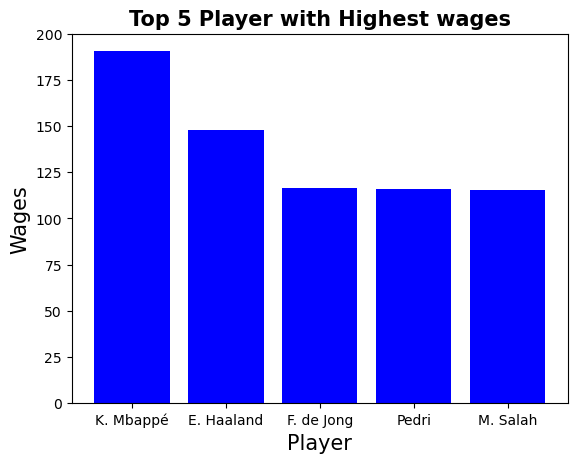

In [43]:
fifa.loc[fifa.Age>40]

# TOP 5 HIGHEST VALUED PLAYERS

wages=fifa2.sort_values(['Value'],ascending=False)[:5]

plt.bar(wages["Name"],wages['Value'],color='Blue')
plt.xlabel('Player',fontsize=15)
plt.ylabel('Wages',fontsize=15)
plt.title('Top 5 Player with Highest wages',fontweight='bold',fontsize=15)
plt.show()

# Countries

In [44]:
top_nat=fifa2['Nationality'].value_counts()[:10]
top_nat

Spain          578
England        487
Argentina      483
France         442
Brazil         395
Germany        389
Italy          295
Portugal       231
Netherlands    224
Uruguay        212
Name: Nationality, dtype: int64

# Countries having most of players.

Text(0.5, 1.0, 'Top 10 Nationalities')

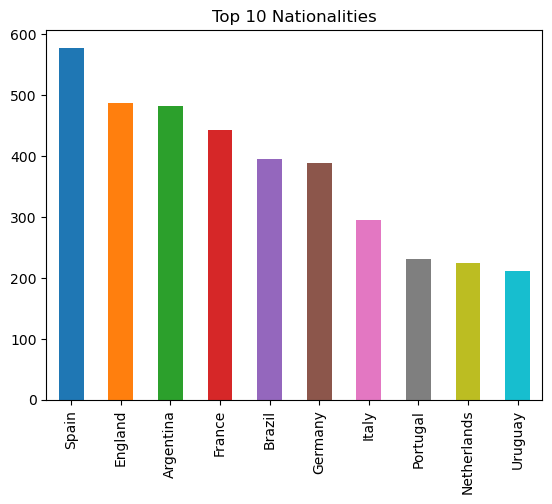

In [45]:

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
top_nat.plot.bar(color=colors)
plt.title('Top 10 Nationalities')

# HEAVIEST PLAYER

In [46]:
fifa2.sort_values(['Weight'],ascending=False)[:5][['Name','Weight']]

,Name,Weight
16072,18 C. Ikeme,10
8353,D. Dike,10
7642,22 K. Mina,10
1437,H. Maguire,10
6154,T. Chorý,10


# POSITION VS PLAYER VALUE

[]

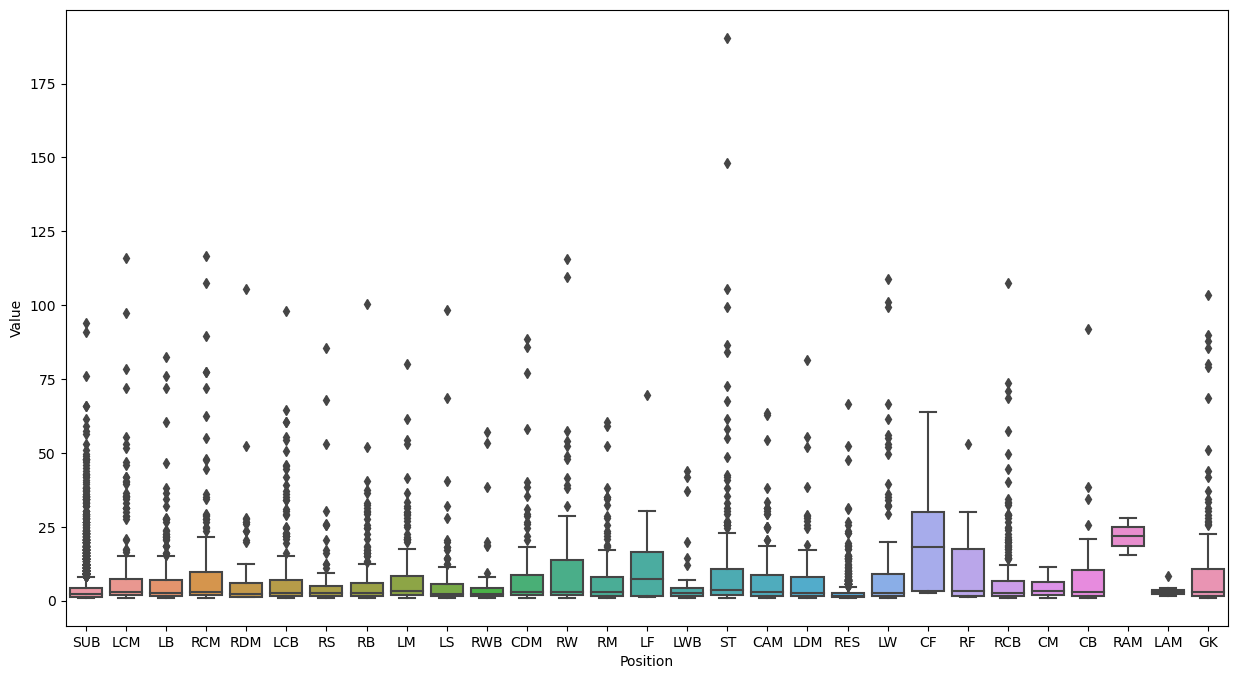

In [47]:
plt.figure(figsize=(15,8))
sns.boxplot(y=fifa2['Value'],x=fifa2['Position'])
plt.plot()


    Ofcourse there are exceptions for each position. But what we can see from this one is that Right and Left forwards mean values are actually at the top compared to all other positions.


# AGILITY, AGGRESSION AND THEIR CORRELATIONS

/tmp/ipykernel_20/24175766.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(fifa3.corr(),2),annot=True,cmap='Blues')


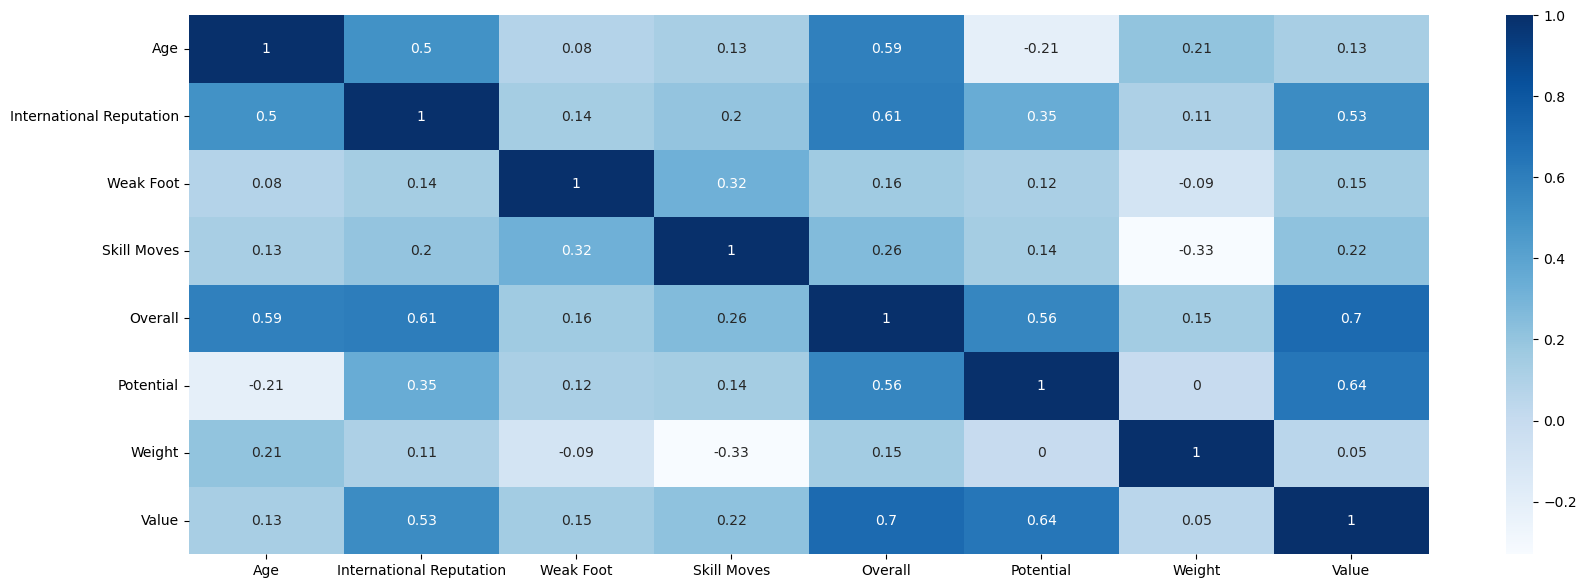

In [48]:
fifa3 = fifa2[['Age','Nationality','International Reputation','Club','Preferred Foot','Weak Foot','Skill Moves','Work Rate',
               'Body Type','Overall','Position','Potential','Joined','Contract Valid Until', 'Weight', 'Height','Value']]

plt.figure(figsize=(20,7))
sns.heatmap(round(fifa3.corr(),2),annot=True,cmap='Blues')
plt.show()

    Some highly correlated features in the dataset that affect the value of a player are as follows:

1. Overall stats: Overall stats have a positive correlation of 0.7 with the value of a player.
2. Potential: The potential of a player has a correlation of 0.64 with their value.
3. International reputation: The international reputation of a player also affects their value.
* These factors suggest that higher overall stats, greater potential, and a strong international reputation contribute to an increase in a player's value.